In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.text import *
DIRECTORY_PATH = '/home/semar/embeddings-leis/'
bs=32

In [3]:
torch.cuda.set_device(1)

In [4]:
home_dir = Path(DIRECTORY_PATH)
data_dir = Path('/home/semar/embeddings-leis/data')
models_dir = Path("/home/semar/embeddings-leis/models")
home_dir.ls()

[PosixPath('/home/semar/embeddings-leis/Cloud'),
 PosixPath('/home/semar/embeddings-leis/pdfs.tar.gz'),
 PosixPath('/home/semar/embeddings-leis/notebooks'),
 PosixPath('/home/semar/embeddings-leis/requirements.txt'),
 PosixPath('/home/semar/embeddings-leis/proposicoes-temas'),
 PosixPath('/home/semar/embeddings-leis/2008'),
 PosixPath('/home/semar/embeddings-leis/POC'),
 PosixPath('/home/semar/embeddings-leis/export_POC'),
 PosixPath('/home/semar/embeddings-leis/scripts'),
 PosixPath('/home/semar/embeddings-leis/comparing_outputs.csv'),
 PosixPath('/home/semar/embeddings-leis/aistudio-fastai-embeddings'),
 PosixPath('/home/semar/embeddings-leis/data'),
 PosixPath('/home/semar/embeddings-leis/results_adm_publica.csv'),
 PosixPath('/home/semar/embeddings-leis/output'),
 PosixPath('/home/semar/embeddings-leis/.gitignore'),
 PosixPath('/home/semar/embeddings-leis/README.md'),
 PosixPath('/home/semar/embeddings-leis/.git'),
 PosixPath('/home/semar/embeddings-leis/results_multi_class.csv'),


In [5]:
import pandas as pd

justifications = pd.read_csv("../data/justifications.csv", sep='|')
justifications.head()

,Unnamed: 0,file_name,id,numero,tipo,previous,justification,full_text
0,0,471150_7039_PL.pdf,471150,7039,PL,"PROJETO DE LEI No\n\n, DE 2010\n\n(Do Sr. Feli...",NaN,"PROJETO DE LEI No\n\n, DE 2010\n\n(Do Sr. Feli..."
1,0,607812_13_REQ.pdf,607812,13,REQ,CAMARA DOS DEPUTADOS\n\nCOMISSAO DE ESPORTE -C...,A imprensa tem divulgado cada vez com mais fre...,CAMARA DOS DEPUTADOS\n\nCOMISSAO DE ESPORTE -C...
2,0,1618524_80_REQ.pdf,1618524,80,REQ,REQUERIMENTO No de 2015\n(Do Sr. Pedro Cunha L...,NaN,REQUERIMENTO No de 2015\n(Do Sr. Pedro Cunha L...
3,0,2080653_254_REQ.pdf,2080653,254,REQ,COMISSAO PARLAMENTAR DE INQUERITO DESTINADA IN...,NaN,COMISSAO PARLAMENTAR DE INQUERITO DESTINADA IN...
4,0,2175138_8638_REQ.pdf,2175138,8638,REQ,"REQUERIMENTO No\n\n, DE 2018\n\n(da Sra. JESSI...",NaN,"REQUERIMENTO No\n\n, DE 2018\n\n(da Sra. JESSI..."


In [6]:
propositions = pd.read_csv("../data/propositions.csv", sep=';')
propositions.head()

,Unnamed: 0,id,siglaTipo,numero,ultimoStatus_dataHora,ano,codTipo,descricaoTipo,ementa,ementaDetalhada,keywords,dataApresentacao,urlInteiroTeor
0,0,2077498,PL,1600,2020-04-06T18:44:00,2020,139,Projeto de Lei,"Altera a Lei nº 8.069, de 13 de julho de 1990,...",NaN,"Alteração, Estatuto da Criança e do Adolescent...",2016-02-18T12:56:57,http://www.camara.gov.br/proposicoesWeb/prop_m...
1,1,2116186,PL,1599,2020-04-06T18:17:00,2020,139,Projeto de Lei,Institui a Semana Nacional de Prevenção e Comb...,NaN,"Criação, Semana Nacional de Prevenção e Combat...",2016-11-07T18:01:00,http://www.camara.gov.br/proposicoesWeb/prop_m...
2,2,2236217,SUG,1,2020-01-03T11:09:00,2020,285,Sugestão,Sugere estudo visando verificar a atuação do M...,NaN,NaN,2020-01-03T11:09:00,http://www.camara.gov.br/proposicoesWeb/prop_m...
3,3,2236218,SUG,2,2020-01-03T11:24:00,2020,285,Sugestão,Sugere audiência pública para debater assuntos...,NaN,NaN,2020-01-03T11:24:00,http://www.camara.gov.br/proposicoesWeb/prop_m...
4,4,2236222,RIC,1,2020-03-18T00:00:00,2020,148,Requerimento de Informação,Requer informações detalhadas ao Ministro da C...,NaN,NaN,2020-01-03T14:50:13,http://www.camara.gov.br/proposicoesWeb/prop_m...


In [7]:
df_prop = pd.merge(justifications, propositions, on="id")
df_prop.head()

,Unnamed: 0_x,file_name,id,numero_x,tipo,previous,justification,full_text,Unnamed: 0_y,siglaTipo,numero_y,ultimoStatus_dataHora,ano,codTipo,descricaoTipo,ementa,ementaDetalhada,keywords,dataApresentacao,urlInteiroTeor
0,0,471150_7039_PL.pdf,471150,7039,PL,"PROJETO DE LEI No\n\n, DE 2010\n\n(Do Sr. Feli...",NaN,"PROJETO DE LEI No\n\n, DE 2010\n\n(Do Sr. Feli...",4262,PL,7039,2019-08-22T00:00:00,2010,139,Projeto de Lei,"Altera a Lei nº 9.503, de 1997, que institui o...",Estabelece requisitos para os membros que comp...,"Alteração, Código de Trânsito Brasileiro, comp...",2010-03-24T17:55:34,http://www.camara.gov.br/proposicoesWeb/prop_m...
1,0,607812_13_REQ.pdf,607812,13,REQ,CAMARA DOS DEPUTADOS\n\nCOMISSAO DE ESPORTE -C...,A imprensa tem divulgado cada vez com mais fre...,CAMARA DOS DEPUTADOS\n\nCOMISSAO DE ESPORTE -C...,1498,REQ,13,2015-03-24T00:00:00,2014,294,Requerimento de Audiência Pública,Requer que seja convidado o relator-geral das ...,NaN,NaN,2014-03-12T11:58:00,http://www.camara.gov.br/proposicoesWeb/prop_m...
2,0,1618524_80_REQ.pdf,1618524,80,REQ,REQUERIMENTO No de 2015\n(Do Sr. Pedro Cunha L...,NaN,REQUERIMENTO No de 2015\n(Do Sr. Pedro Cunha L...,21672,REQ,80,2015-09-24T00:00:00,2015,147,Requerimento,Requer a convocação do Sr. João Henrique de Al...,NaN,NaN,2015-08-12T18:46:00,http://www.camara.gov.br/proposicoesWeb/prop_m...
3,0,2080653_254_REQ.pdf,2080653,254,REQ,COMISSAO PARLAMENTAR DE INQUERITO DESTINADA IN...,NaN,COMISSAO PARLAMENTAR DE INQUERITO DESTINADA IN...,2910,REQ,254,2016-08-11T00:00:00,2016,147,Requerimento,Requer que esta Comissão Parlamentar de Inquér...,NaN,NaN,2016-03-30T10:08:00,http://www.camara.gov.br/proposicoesWeb/prop_m...
4,0,2175138_8638_REQ.pdf,2175138,8638,REQ,"REQUERIMENTO No\n\n, DE 2018\n\n(da Sra. JESSI...",NaN,"REQUERIMENTO No\n\n, DE 2018\n\n(da Sra. JESSI...",5960,REQ,8638,2018-05-15T16:58:00,2018,318,Requerimento de Inclusão na Ordem do Dia,Requer a inclusão na Ordem do Dia do Projeto d...,NaN,NaN,2018-05-15T16:58:00,http://www.camara.gov.br/proposicoesWeb/prop_m...


In [8]:
data_lm = (TextList.from_df(df_prop, cols="full_text")
           .split_by_rand_pct(0.2)
           .label_for_lm()
           .databunch(bs=bs, num_workers=8))

len(data_lm.vocab.itos),len(data_lm.train_ds), data_lm

(60000,
 77120,
 TextLMDataBunch;
 
 Train: LabelList (77120 items)
 x: LMTextList
 xxbos xxup projeto xxup de xxup lei xxmaj no 
  
   , xxup de 2010 
  
   ( xxmaj do xxmaj sr . xxmaj felipe xxmaj bornier ) 
  
   xxmaj altera a xxmaj lei no 9.503 , de 1997 , que 
   institui o xxmaj codigo de xxmaj transito xxmaj brasileiro , para 
   dispor sobre a composicao das xxmaj juntas 
   xxmaj administrativas de xxmaj recursos de xxmaj infracoes - 
   xxup jari . 
  
   o xxmaj congresso xxmaj nacional decreta : 
  
   xxmaj art . 1o xxmaj esta xxmaj lei acrescenta paragrafo ao art . 16 da xxmaj lei no 
   9.503 , de 23 de setembro de 1997 , para dispor sobre a composicao das xxmaj juntas 
   xxmaj administrativas de xxmaj recursos de xxmaj infracoes - xxup jari . 
   xxmaj art . 2o o art . 16 da xxmaj lei no 9.503 , de 1997 , passa a vigorar 
   acrescido do seguinte xxup ss 2o , renumerando - se o atual paragrafo unico para xxup ss 1o : 
   " xxmaj art . 16 . xxrep 79 . 
   xxrep 93 . 
 

In [9]:
df_clas = pd.read_csv("../data/proposicoesTemas.csv", sep=';')
df_clas.head()

,uriProposicao,siglaTipo,numero,ano,codTema,tema,relevancia
0,https://dadosabertos.camara.leg.br/api/v2/prop...,MPV,921.0,2020.0,70,Finanças Públicas e Orçamento,0
1,https://dadosabertos.camara.leg.br/api/v2/prop...,MPV,921.0,2020.0,56,Saúde,0
2,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,1600.0,2020.0,44,Direitos Humanos e Minorias,0
3,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,1600.0,2020.0,66,"Indústria, Comércio e Serviços",0
4,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,1600.0,2020.0,56,Saúde,0


In [10]:
df_clas['id'] = [url.split("/")[-1] for url in df_clas['uriProposicao']]
df_clas.head()

,uriProposicao,siglaTipo,numero,ano,codTema,tema,relevancia,id
0,https://dadosabertos.camara.leg.br/api/v2/prop...,MPV,921.0,2020.0,70,Finanças Públicas e Orçamento,0,2236866
1,https://dadosabertos.camara.leg.br/api/v2/prop...,MPV,921.0,2020.0,56,Saúde,0,2236866
2,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,1600.0,2020.0,44,Direitos Humanos e Minorias,0,2077498
3,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,1600.0,2020.0,66,"Indústria, Comércio e Serviços",0,2077498
4,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,1600.0,2020.0,56,Saúde,0,2077498


In [11]:
df_clas['id'] = df_clas['id'].astype('int64')
df = pd.merge(df_prop, df_clas, on=['id'] )
print(df.shape)

(53438, 27)


In [1]:
df[df['tema'] == 'Administração Pública', "codTema"]

NameError: name 'df' is not defined

In [22]:
df['target'] = ''
value_counts = df['codTema'].value_counts()
for idx in df['id'].unique():
    # Como cada linha é um tema, eu faço o subset de todo mundo que tem esse id
    # e confiro se algum dos temas daquela proposta é de administração pública
    aux = df[df['id'] == idx]
    # 34 é o código de administração publica no dataset
    if 34 in aux['codTema']:
        df.loc[df['id'] == idx, 'target'] = 1
    else:
        df.loc[df['id'] == idx, 'target'] = 0

In [23]:
print(df.shape)
df = df.drop_duplicates(subset='file_name')
print(df.shape)
df.head()

(53438, 28)
(40704, 28)


,Unnamed: 0_x,file_name,id,numero_x,tipo,previous,justification,full_text,Unnamed: 0_y,siglaTipo_x,...,dataApresentacao,urlInteiroTeor,uriProposicao,siglaTipo_y,numero,ano_y,codTema,tema,relevancia,target
0,0,471150_7039_PL.pdf,471150,7039,PL,"PROJETO DE LEI No\n\n, DE 2010\n\n(Do Sr. Feli...",NaN,"PROJETO DE LEI No\n\n, DE 2010\n\n(Do Sr. Feli...",4262,PL,...,2010-03-24T17:55:34,http://www.camara.gov.br/proposicoesWeb/prop_m...,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,7039.0,2010.0,61,"Viação, Transporte e Mobilidade",0,0
1,0,2204216_3045_PL.pdf,2204216,3045,PL,"PROJETO DE LEI No\n\n, DE 2019\n\n(Do Sr. NELS...",NaN,"PROJETO DE LEI No\n\n, DE 2019\n\n(Do Sr. NELS...",11997,PL,...,2019-05-21T20:19:04,http://www.camara.gov.br/proposicoesWeb/prop_m...,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,3045.0,2019.0,64,"Agricultura, Pecuária, Pesca e Extrativismo",0,0
3,0,550428_4149_PL.pdf,550428,4149,PL,"PROJETO DE LEI No\n\n, DE 2012\n\n(Do Sr. Leon...",NaN,"PROJETO DE LEI No\n\n, DE 2012\n\n(Do Sr. Leon...",11697,PL,...,2012-07-03T19:14:30,http://www.camara.gov.br/proposicoesWeb/prop_m...,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,4149.0,2012.0,41,Cidades e Desenvolvimento Urbano,0,0
4,0,969167_621_PL.pdf,969167,621,PL,"PROJETO DE LEI No\n\n, DE 2015\n\n(Da Deputada...",NaN,"PROJETO DE LEI No\n\n, DE 2015\n\n(Da Deputada...",2565,PL,...,2015-03-06T11:22:41,http://www.camara.gov.br/proposicoesWeb/prop_m...,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,621.0,2015.0,42,Direito Civil e Processual Civil,0,0
5,0,593145_6411_PL.pdf,593145,6411,PL,"PROJETO DE LEI No\n\n, DE 2013\n\n(Do Sr. CARL...",NaN,"PROJETO DE LEI No\n\n, DE 2013\n\n(Do Sr. CARL...",19869,PL,...,2013-09-24T17:23:00,http://www.camara.gov.br/proposicoesWeb/prop_m...,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,6411.0,2013.0,58,Trabalho e Emprego,0,0


In [24]:
df['target'].sum(), df.shape[0] - df['target'].sum(), df.shape

(1, 40703, (40704, 28))

# Split train and validation datasets

In [16]:
import numpy as np
idx = np.random.permutation(df.shape[0])
split_point = int(df.shape[0] * 0.8)
train_idx, test_idx = idx[:split_point], idx[split_point:]
df['is_valid'] = False
for i, (idx, line) in enumerate(df.iterrows()):
    if i in test_idx:
        df.loc[df["id"] == line['id'], 'is_valid'] = True

df['is_valid'].sum()

8141

In [18]:
df.to_csv("df_binary_adm_publica.csv")

In [8]:
df = pd.read_csv("df_binary_adm_publica.csv")

In [13]:
df['ementa'] = df['ementa'].fillna("")
df['ementaDetalhada'] = df['ementaDetalhada'].fillna("")
df['target'] = df['target'].fillna("")

df.head()

In [14]:
bs=84
data_class = (TextList.from_df(df, cols=["ementa", "ementaDetalhada", "full_text"], vocab=data_lm.vocab)
              .split_from_df("is_valid")
              .label_from_df(cols='target')
              .databunch(bs=bs, num_workers=8))

data_class

TextClasDataBunch;

Train: LabelList (32563 items)
x: TextList
xxbos xxmaj altera a xxmaj lei xxunk 9.503 , de 1997 , que institui o xxmaj xxunk de xxmaj xxunk xxmaj brasileiro , para dispor sobre a xxunk das xxmaj juntas xxmaj administrativas de xxmaj recursos de xxmaj xxunk - xxup jari . xxmaj estabelece requisitos para os membros que xxunk as xxup jari e xxunk a xxunk de servidores e pessoas ligadas aos xxunk ou entidades executivos de xxunk ou xxunk . xxup projeto xxup de xxup lei xxmaj no 
 
  , xxup de 2010 
 
  ( xxmaj do xxmaj sr . xxmaj felipe xxmaj bornier ) 
 
  xxmaj altera a xxmaj lei no 9.503 , de 1997 , que 
  institui o xxmaj codigo de xxmaj transito xxmaj brasileiro , para 
  dispor sobre a composicao das xxmaj juntas 
  xxmaj administrativas de xxmaj recursos de xxmaj infracoes - 
  xxup jari . 
 
  o xxmaj congresso xxmaj nacional decreta : 
 
  xxmaj art . 1o xxmaj esta xxmaj lei acrescenta paragrafo ao art . 16 da xxmaj lei no 
  9.503 , de 23 de setembro de 1997 ,

In [15]:
from sklearn.metrics import f1_score
prec = Precision()
rec = Recall()

@np_func
def f1(inp,targ): return f1_score(targ, np.argmax(inp, axis=-1))
learn_c = text_classifier_learner(data_class,
                                  AWD_LSTM,
                                  metrics=[accuracy, prec, rec, f1]).to_fp16()

learn_c.load_encoder(home_dir/'models/language_model_enc')
learn_c.model

SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(60000, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(60000, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
        (1): RNNDropout()
        (2): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.4, inplace=False)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace=True)
      (4): BatchNorm1d(50, 

epoch,train_loss,valid_loss,accuracy,precision,recall,f1,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.20E-01
Min loss divided by 10: 1.74E-02


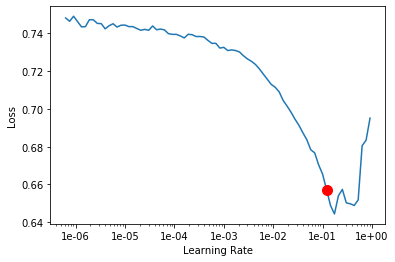

In [21]:
learn_c.lr_find()
learn_c.recorder.plot(suggestion=True)

In [16]:
lr = 2e-2
learn_c.freeze()
learn_c.fit_one_cycle(2, lr, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,precision,recall,f1,time
0,0.390771,0.353157,0.870041,1.000000,0.000944,0.001113,14:46
1,0.367434,0.341266,0.870900,1.000000,0.007554,0.011934,15:09


/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/

/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/

/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/

/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/

/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/

/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/

In [17]:
lr /= 10
learn_c.unfreeze()
learn_c.fit_one_cycle(3, lr, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,precision,recall,f1,time
0,0.286963,0.267347,0.896327,0.635904,0.474976,0.489099,21:05
1,0.223844,0.252558,0.911190,0.901914,0.355996,0.464800,22:17
2,0.179307,0.188438,0.929615,0.778032,0.642115,0.675439,21:44


/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/

In [ ]:
learn_c.save("adm-publica-10-epochs")

In [18]:
learn_c.fit_one_cycle(5, lr/(2.6**4), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,precision,recall,f1,time
0,0.170017,0.192152,0.927527,0.837410,0.549575,0.621319,21:42
1,0.169071,0.187484,0.930475,0.799514,0.621341,0.671595,20:53
2,0.161341,0.187788,0.930475,0.766486,0.669500,0.687207,19:33
3,0.157675,0.187457,0.930107,0.784223,0.638338,0.674811,21:29
4,0.169844,0.188373,0.931212,0.779395,0.657224,0.685906,19:31


/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/home/semar/.pyenv/versions/

In [ ]:
learn_c.save("adm-publica-13-epochs")

In [ ]:
learn_c.fit_one_cycle(3, lr/(2.6**4), moms=(0.8, 0.7))

In [ ]:
learn_c.save("adm-publica-16-epochs")

In [ ]:
learn_c.save(models_dir/'final_adm_publica')

In [19]:
interp = ClassificationInterpretation.from_learner(learn_c)

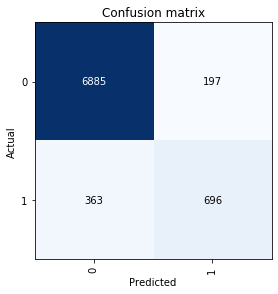

In [20]:
interp.plot_confusion_matrix()

In [ ]:
len(learn_c.data.valid_ds)

In [ ]:
all
acc, precision, recall, f1
0.931212, 0.779395, 0.657224, 0.685906